<a href="https://colab.research.google.com/github/terra2n/2025_KB_TI-1C/blob/main/KB_Jobsheet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# face_detector.ipynb

Deteksi Wajah Menggunakan Citra Digital

In [ ]:
pip install opencv-python

In [ ]:
import cv2

In [ ]:
img = cv2.imread('mypicture.jpg')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 9)

In [ ]:
for (x, y, w, h) in faces_rect:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

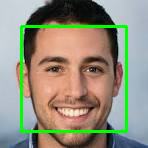

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# smile_detector.ipynb

Deteksi Wajah dan Senyum Menggunakan Citra Digital

In [ ]:
import cv2

In [ ]:
img = cv2.imread('mypicture.jpg')

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

In [ ]:
faces = face_cascade.detectMultiScale(gray,1.1, 9)
print('Number of detected faces:', len(faces))

Number of detected faces: 1


In [ ]:
if smile_cascade.empty():
    print("Error loading smile cascade classifier!")
    # Handle the error (e.g., exit the program or display a message)
else:
    # Proceed with smile detection
    for (x, y, w, h) in faces:
        # Menggambar persegi pada wajah
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        # ROI untuk deteksi senyum (sedikit diperbesar)
        roi_gray = gray[y:y + h + 10, x:x + w + 10]
        roi_color = img[y:y + h + 10, x:x + w + 10]

        # Pra-pemrosesan: Histogram Equalization
        roi_gray = cv2.equalizeHist(roi_gray)

        # Deteksi senyum dengan parameter yang disesuaikan
        smiles = smile_cascade.detectMultiScale(roi_gray,
                                               scaleFactor=1.3,  # Dikecilkan untuk deteksi lebih teliti
                                               minNeighbors=15,  # Disesuaikan untuk mengurangi false positive
                                               minSize=(30, 30))  # Ukuran minimum senyum diperbesar

        if len(smiles) > 0:
            print("smile detected")
            # Ambil senyum dengan area terbesar (jika ada beberapa deteksi)
            (sx, sy, sw, sh) = max(smiles, key=lambda item: item[2] * item[3])
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
            cv2.putText(roi_color, "Smile", (sx, sy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            print("smile not detected")

smile detected


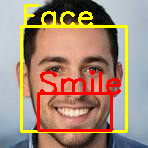

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# face_detector_webcam.ipynb


In [ ]:
import cv2
import numpy as np

In [ ]:
faceDetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
camera = cv2.VideoCapture(0)

In [ ]:
while True:
    # Read a frame from the camera
    ret, img = camera.read()

    # Check if frame reading was successful
    if not ret:  # Check 'ret' instead of 'camera.isOpened()'
        print("Error: Frame not captured. Check camera connection.")
        break  # Exit the loop if frame capture fails

    # Convert the frame to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = faceDetect.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the frame with detected faces
    cv2.imshow("Face Detection", img)

    # Exit on pressing 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close windows
camera.release()
cv2.destroyAllWindows()

Error: Frame not captured. Check camera connection.
